# Classification Python Workshop for IoT Sector Related Data

In this notebook, we will:
- read in and clean/tidy data (preprocessing)
- understand what applications classification is useful for in machine learning
- how to deal with unbalanced classes
- explore different classification models and evaluate performance

In [1]:
# Loading in some basic Python libraries. We will use pandas and matplotlib to begin
import pandas as pd
import matplotlib.pyplot as plt

### What dataset are we using, exactly?

This data was collected from a series of simulations conducted on the Contiki Cooja IoT simulator. Contiki is an operating system for low power, memory-constrained, limited network IoT devices, such as sensors. Cooja is a Contiki network simulator. The simulations were conducted with the intention to predict SHA, DFA, SFA, SYA, and VNA attacks on IoT devices through observing the key feature differences between the normal and vulnerable nodes. 

The features contained in this dataset include Source Mote, Destination Mote, Packet Count, Source Mote Ratio, Destination Mote Ratio, Source Mote Duration, Destination Mote Duration, Total Packet Duration, Total Packet Length, Source Packet Ratio, Destination Packet Ratio, DIO Message Count, DIS Message Count, DAO Message Count, Other Message Count, and Label.

If you would like to read more and access this dataset for yourself, you can find it through this link:
https://www.kaggle.com/datasets/mkhubaiib/iot-attack-prediction-dataset

In [2]:
# Reading the csv dataset into our Python environment
df = pd.read_csv('All_Attacks.csv')
df.head() # Only first few rows of data for viewing clarity

,second,src,dst,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg,label
0,61,2,32,1,0.500000,1.000000,0.013889,1.000000,0.020000,37,0.500000,1.000000,0,0,0,1,1
1,61,4,32,1,0.500000,1.000000,0.986111,1.000000,1.419998,37,0.500000,1.000000,0,0,0,1,1
2,62,24,16,2,0.666667,0.666667,0.751425,0.751425,0.008049,187,0.785714,0.785714,0,0,2,0,1
3,62,16,24,1,0.333333,0.333333,0.248576,0.248576,0.002663,51,0.214286,0.214286,0,0,0,1,1
4,63,16,24,1,1.000000,1.000000,1.000000,1.000000,0.002953,60,1.000000,1.000000,0,0,0,2,1


### More about the label column...

The label column describes the class of IoT attack that was detected. There are 5 classes of IoT attacks simulated in this dataset, with each attack labelled from 1 through 5, respectively:

1. SHA (Secure Hashing Algorithm) - The use of cryptographic hash functions to exploit vulnerabilities in data transmission from IoT devices. Attackers can verify/manipulate data and compromise authentication mechanisms if security protocols are not properly implemented.
2. DFA (Differential Fault Attack) - Introduces controlled faults or errors into cryptographic calculations. By analyzing the varying intermediate values and outputs of the algorithm, an attacker can extract sensitive information, such as passwords/keys, from IoT devices.
3. SFA (Selective Forwarding Attack) - This is a case where some packets (data or control messages) are deleted, while others are successfully forwarded. This interrupts the device routing process and affects efficiency of the network. The impact of this attack lies in the percentage of packets lost.
4. SYA (Sybil Attack) - In this type of attack, nodes pretend to be more than one node simultaenously. As a result, there can be a theft of data, since illegitimate nodes can take the identity of legitimate nodes and send the traffic to another place.
5. VNA (Version Number Attack) - An attacker maliciously changes the version number of a network. This type of attack affects the network performance and packet delivery ratio, due to increase in delay and control overhead (how much routing and control information necessary to transmit data from application to destination).

Let's see how many occurrences of each IoT attack were recorded in this dataset. 

In [3]:
# Viewing occurrences of each class in label column
df['label'].value_counts()

1    2405
4    2273
3    2256
5    2102
2    1809
Name: label, dtype: int64

We can see that the IoT attack corresponding to the label 1 has the most occurences at 2405 and the one corresponding to label 2 has the least occurrences at 1809. It is quite confusing to refer the label number to the attack, every time we want to use this data. Let's attempt to map the numerical labels to more comprehensible data. 

In [4]:
# Define the mapping of numeric labels to IoT attack names
label_mapping = {
    1: 'SHA',
    2: 'DFA',
    3: 'SFA',
    4: 'SYA',
    5: 'VNA'
}

# Replace the numeric labels in the 'label' column
df['label'] = df['label'].map(label_mapping)

# Viewing occurrences of each class again
df['label'].value_counts()

SHA    2405
SYA    2273
SFA    2256
VNA    2102
DFA    1809
Name: label, dtype: int64

This is much clearer and easier to understand! We can directly see that SHA attacks are most common, followed by SYAs, SFAs, VNAs and DFAs in descending order. Let's do a quick visualization of this!

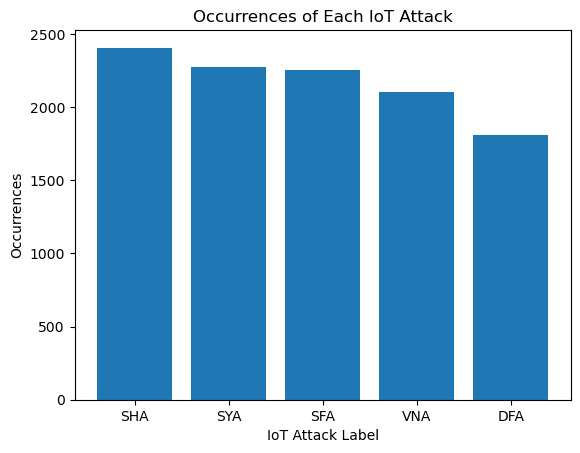

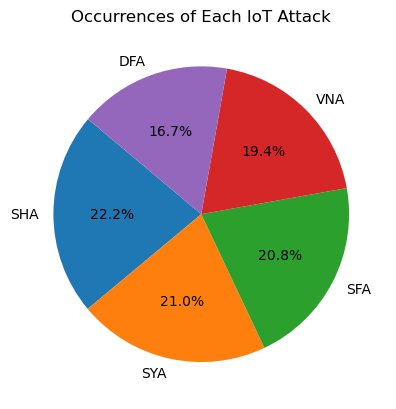

In [5]:
# Data Visualization Analysis
label_data = df['label'].value_counts()

# Bar Plot
plt.bar(label_data.index, label_data.values)
plt.xlabel('IoT Attack Label')
plt.ylabel('Occurrences')
plt.title('Occurrences of Each IoT Attack')
plt.show()

# Pie Plot
plt.pie(label_data, labels=label_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Occurrences of Each IoT Attack')
plt.show()

### Now that our target variable, the label, has been cleaned, let's obtain a quick summary of our features using .info() and .describe()!

In [6]:
feats_df = df.drop(columns=['label']) # Splitting off label column to create separate dataframe of just features

In [7]:
# Concise Dataset Summary
print(feats_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   second               10845 non-null  int64  
 1   src                  10845 non-null  int64  
 2   dst                  10845 non-null  int64  
 3   packetcount          10845 non-null  int64  
 4   src_ratio            10845 non-null  float64
 5   dst_ratio            10845 non-null  float64
 6   src_duration_ratio   10845 non-null  float64
 7   dst_duration_ratio   10845 non-null  float64
 8   TotalPacketDuration  10845 non-null  float64
 9   TotalPacketLenght    10845 non-null  int64  
 10  src_packet_ratio     10845 non-null  float64
 11  dst_packet_ratio     10845 non-null  float64
 12  DioCount             10845 non-null  int64  
 13  DisCount             10845 non-null  int64  
 14  DaoCount             10845 non-null  int64  
 15  OtherMsg             10845 non-null 

In this dataset, there are:

- 16 columns and 10845 rows
- 7 float64 columns and 9 int64 columns
- no missing values from any columns in the dataset! Each column has 10845 non-null values!

In [8]:
# Descriptive Statistics Analysis
print(feats_df.describe())

             second           src           dst   packetcount     src_ratio  \
count  10845.000000  10845.000000  10845.000000  10845.000000  10845.000000   
mean     338.096081     19.472476     28.188658      1.566805      0.290404   
std      145.679764     11.932040     10.311293      0.968465      0.212384   
min       60.000000      0.000000      0.000000      1.000000      0.034483   
25%      216.000000     13.000000     18.000000      1.000000      0.111111   
50%      343.000000     16.000000     30.000000      1.000000      0.235294   
75%      460.000000     26.000000     32.000000      2.000000      0.444444   
max      591.000000     50.000000     51.000000     10.000000      1.000000   

          dst_ratio  src_duration_ratio  dst_duration_ratio  \
count  10845.000000        10845.000000        10845.000000   
mean       0.377594            0.287160            0.435793   
std        0.214736            0.304885            0.368901   
min        0.034483            0.000

Displayed above is a descriptive statistical analysis of the features dataset, giving us the mean, std, min, max, etc. of the values in each column. This information can be useful to provide an overview of the data and identify patterns/outliers.

### Binary Classification - Preprocessing

Let's say we want to determine if a detected IoT attack is a SHA attack, using the information from this dataset. Preprocessing is an important step to make sure we can draw meaningful analyses from the data.

##### Since this is a binary classification issue (either is SHA or not SHA), we must remove the label column, as it has 5 categories.

In [9]:
dummies = pd.get_dummies(df, columns=['label'])[['label_SHA']]
dummies

,label_SHA
0,1
1,1
2,1
3,1
4,1
...,...
10840,0
10841,0
10842,0
10843,0


In [10]:
dfbc = df.assign(Is_SHA = dummies['label_SHA'])
upsampleDC = dfbc # Used later in handling unbalanced classes

Let's take a look at what our dataframe looks like now!

In [11]:
dfbc.head()

,second,src,dst,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg,label,Is_SHA
0,61,2,32,1,0.500000,1.000000,0.013889,1.000000,0.020000,37,0.500000,1.000000,0,0,0,1,SHA,1
1,61,4,32,1,0.500000,1.000000,0.986111,1.000000,1.419998,37,0.500000,1.000000,0,0,0,1,SHA,1
2,62,24,16,2,0.666667,0.666667,0.751425,0.751425,0.008049,187,0.785714,0.785714,0,0,2,0,SHA,1
3,62,16,24,1,0.333333,0.333333,0.248576,0.248576,0.002663,51,0.214286,0.214286,0,0,0,1,SHA,1
4,63,16,24,1,1.000000,1.000000,1.000000,1.000000,0.002953,60,1.000000,1.000000,0,0,0,2,SHA,1


In [12]:
# Provide us correlation values
dfbc.corr()['Is_SHA'] * 100

C:\Users\grape\AppData\Local\Temp\ipykernel_16696\1131579.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfbc.corr()['Is_SHA'] * 100


second                   4.722311
src                      4.313406
dst                      6.232585
packetcount              2.058962
src_ratio              -10.057773
dst_ratio               -3.938324
src_duration_ratio      -8.671680
dst_duration_ratio      -0.432061
TotalPacketDuration     -2.900428
TotalPacketLenght       -0.327493
src_packet_ratio        -9.408989
dst_packet_ratio        -4.370225
DioCount                 2.403816
DisCount                 9.112391
DaoCount                -5.756589
OtherMsg                -0.332465
Is_SHA                 100.000000
Name: Is_SHA, dtype: float64

The .corr() method from the pandas library is used to compute and obtain pairwise correlation values between the feature columns to the target column, 'Is_SHA'. The negative values imply a negative correlation to the target and the positive values imply a positive correlation to the target. The magnitude of the value describes how strong each correlation is. We can see for example that the higher the DIS Message Count, the more likely it is to be an SHA attack. But the higher the DAO Message Count, the less likely it is to be an SHA attack.

The function below will take our dataframe as an input and apply a one-hot encoding to transform our categorical variables into a binary representation (either 0 for False or 1 for True). Then, we will separate the features and target for our binary classification model to use.

In [13]:
def transform_to_numeric(df):
    d1 = df.drop(labels=['label'], axis=1).fillna(0)
    return pd.get_dummies(d1).replace({True: 1, False: 0})
numeric = transform_to_numeric(dfbc)

In [14]:
X = numeric.drop('Is_SHA', axis=1) # Separating Features from Target
y = numeric['Is_SHA'] # Target Column: 'Is_SHA'

In [15]:
y.value_counts() # Displaying 'Is_SHA' Class Balance

0    8440
1    2405
Name: Is_SHA, dtype: int64

There are 8440 attacks recorded that are not SHA attacks, while 2405 are SHA attacks. 

The proportions of this binary class can be defined as:
- 0 - NOT SHA: 8440/(8440 + 2405) = 0.77823882
- 1 - IS SHA: 2405/(8440 + 2405) = 0.22176118


### Dummy Classifier Model

Let's begin by applying a Dummy Classifier model to determine whether an IoT attack is an SHA attack or not. The Dummy Classifier is the baseline model for classification from sklearn and is used frequently in binary classification problems. Dummy Classifiers work by using a predetermined strategy to make predictions. By default, its strategy is to predict the most frequent class from the training data. Baseline models such as the Dummy Classifier can help us understand the data/problem better as they are simplisitic, providing us with a benchmark for evaluating more complex models. IF you would like to read more about the Dummy Classifier, take a look at sklearn's documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

There is a general procedure for working with classifier models:
1. Read the data
2. Create training and testing data for both your features (X) and target variable (y). The target variable in this case would be a categorical variable (classes).
3. Next step is to create the classifier object. This could be a dummy classifier, logistic regression, K-nearest neighbours, SVMs (support vector machines), and more.
4. Fit the classifier.
5. Predict on new examples (X_test).
6. Score the model, by comparing the predictions from X_test using your model against true values of the y_test.

Let's take a look at how we would approach these steps one-by-one using a Dummy Classifier! We have already read the data into our Python environment, so let's begin at step 2!

#### Step 2: 

We can accomplish this using the train_test_split module from the sklearn library! This is how:

In [16]:
from sklearn.model_selection import train_test_split

# Performing a train-test split on the data for our model to use
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 3 & 4:

Since we'll be using the Dummy Classifier from sklearn, let's import the module into our Python environment. Then, we will create an object for the Dummy Classifier model and fit our training data to the model. 

In [17]:
# Import the Dummy Classifier 
from sklearn.dummy import DummyClassifier 

# Creating/Fitting Object for Dummy Classifier Model
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

DummyClassifier()

#### Step 5 & 6:

We can now make predictions using the testing data and evaluate the performance of the model using the .score method from sklearn. Note that using .score will automate the prediction of the data using X_test and compare the results to y_test, computing the R^2 value (a measure of variance).

In [18]:
# Making Predictions + Evaluating Performance
print("The accuracy of the model on the training data: %0.3f" % (dummy_clf.score(X_test, y_test)))

The accuracy of the model on the training data: 0.781


Using the Dummy Classifier model, we were able to predict SHA attacks from the testing data with a 78.1% accuracy. This is as expected, since the Dummy Classifier will tend to pick the majority class (not SHA attack) and will guess wrong for the minority class (is SHA attack) in the testing dataset. Since SHA attacks make up approximately 22% of the dataset, our results make sense.

### Class Imbalances in Binary Classification

Now, let's take a look at the upsampleDC dataframe we created upon preprocessing the data for binary classification. We will be addressing class imbalance issues and how to deal with them.

In [19]:
upsampleDC = upsampleDC.drop(['label'], axis = 1)
upsampleDC.head()

,second,src,dst,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg,Is_SHA
0,61,2,32,1,0.500000,1.000000,0.013889,1.000000,0.020000,37,0.500000,1.000000,0,0,0,1,1
1,61,4,32,1,0.500000,1.000000,0.986111,1.000000,1.419998,37,0.500000,1.000000,0,0,0,1,1
2,62,24,16,2,0.666667,0.666667,0.751425,0.751425,0.008049,187,0.785714,0.785714,0,0,2,0,1
3,62,16,24,1,0.333333,0.333333,0.248576,0.248576,0.002663,51,0.214286,0.214286,0,0,0,1,1
4,63,16,24,1,1.000000,1.000000,1.000000,1.000000,0.002953,60,1.000000,1.000000,0,0,0,2,1


In [20]:
upsampleDC['Is_SHA'].value_counts(normalize=True)

0    0.778239
1    0.221761
Name: Is_SHA, dtype: float64

As you can see, the binary class is unbalanced, as the data shows only 22.2% of IoT attacks detected to be SHA attacks. We want to upsample the minority class (is SHA attack) to balance this out. The RandomOverSampler will duplicate random data points from the minority class until the distribution is even.

In [21]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = "not majority") # we wish to upsample the not majority class (minority class)
X_res , y_res = ros.fit_resample(X,y)

In [22]:
y_res.value_counts(normalize=True)

1    0.5
0    0.5
Name: Is_SHA, dtype: float64

As you can see, the frequency of each binary class is now equal! There is a 50-50 split of SHA attacks and non-SHA attacks.
Let's try refitting the Dummy Classifier model on the upsampled dataset and see how this changes our results!

In [23]:
# Performing a train-test split
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Creating/Fitting Object for Dummy Classifier Model
dummy_clf = DummyClassifier()
dummy_clf.fit(X_res_train, y_res_train);

# Making Predictions + Evaluating Performance
print("The accuracy of the model on the training data: %0.3f" % (dummy_clf.score(X_res_test, y_res_test)))

The accuracy of the model on the training data: 0.488


Upon balancing the distribution of the binary class and refitting the Dummy Classifer model, we see that our classification model is able to predict SHA attacks with an accuracy of 48.8%. This makes sense as our Dummy Classifier model wants to predict the majority class from the training data, but since both classes are now evenly distributed, we essentially have a random guess. 

### More Classification Models: Logistic Regression for Binary Classification

Logistic Regression is another statistical analysis method that is used to predict the probability of a binary outcome (true/false, yes/no, etc.) based on the input variables that are passed in. It models the probability of an input belonging to a certain class by fitting a sigmoid curve to the data, and mapping the range between 0 and 1. By tuning the parameters through training, the logistic regression model will attempt to minimize the differences between our predictions and the actual testing data. 

This method works by summing each input features' associated weight (impact on outcome probability) and comparing it to a threshold value (commonly set as 0.5 in binary classification). If the total weight value is above the threshold, the logistic regression model determines that it is part of the positive class (is SHA attack, in our case) and if it is below the threshold, the model determines that it is part of the negative class (not SHA attack, in our case).

You can read more about logistic regression from sklearn's documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### Step 2:

In [24]:
# Performing a train-test split
X = numeric.drop('Is_SHA', axis=1)
y = numeric['Is_SHA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 3 & 4:

In [25]:
# Import the Logistic Regression
from sklearn.linear_model import LogisticRegression

# Creating/Fitting Object for Logistic Regression Model 
lr_clf = LogisticRegression(max_iter=2000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

#### Step 5 & 6:

In [26]:
# Making Predictions + Evaluating Performance
print("The accuracy of the model on the training data: %0.3f" % (lr_clf.score(X_test,y_test)))

The accuracy of the model on the training data: 0.785


Using the Logistic Regression model for binary classification, we are able to predict SHA attacks with an accuracy of 78.5%. This is marginally better than the results of the Dummy Classifier model.

### Your turn! K-Nearest Neighbors Classifier for Binary Classification!

Using what you've learned above from conducting binary classification with the Dummy Classifier model and the Logistic Regression model, let's see if you can try the K-Nearest Neighbors Classifier on your own! Like most classifiers, this model will also follow the same 6 steps you saw earlier, so refer to them as you need!

The K-Nearest Neighbors Classifier is an algorithm that makes predictions for an input, based on the classes of its k-nearest neighboring data points from the training data. The class that seems to appear most frequently out of these k-nearest neighbors is assigned to be the predicted class of the data input in question. It essentially works by the idea that similar data points tend to belong to similar classes. By default, KNeighborsClassifier() uses 5 neighbors for queries, but you can modify the number of neighbors this algorithm considers by editing the n_neighbors parameter (e.g. model = KNeighborsClassifier(n_neighbors = 3)).

Using this link, you can read more about the K-Nearest Neighbor Classifier from the sklearn documentation if you are curious: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [27]:
# Answer Key - Uncomment code below to see the results!

# # Performing a train-test split
# X = numeric.drop('Is_SHA', axis=1)
# y = numeric['Is_SHA']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# from sklearn.neighbors import KNeighborsClassifier
# # Creating/Fitting Object for KNeighborsClassifier Model 
# knn_clf = KNeighborsClassifier(n_neighbors=10) # Try playing with the n_neighbors parameter
# knn_clf.fit(X_train, y_train)

# # Making Predictions + Evaluating Performance
# print("The accuracy of the model on the training data: %0.3f" % (knn_clf.score(X_test,y_test)))

### Multi-class Classification: Decision Tree Classifier

Now, let's take a look at a multi-class classification issue. Specifically, we want to train a model to predict what type of IoT attack is detected based on the input features from our data. Remember, we have 5 classes to distinguish from: SHA, DFA, SFA, SYA, and VNA. 

In order to approach this task, let's begin by using the Decision Tree Classifier from sklearn as our model. Decision Tree Classifiers work by creating a tree-like structure detailing a set of conditional rules based on the input features. At each node of the tree, the algorithm will determine which feature best distinguishes the data points. This process is repeated recursively until we ultimately get to the leaf nodes, which are the class labels. You can read more about Decision Tree Classifiers from the sklearn documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

We will be following the general process for dealing with classifier models, as done with the Dummy Classifier and Logistic Regression model earlier. 

#### Step 2:

In [28]:
# Performing a train-test split
X = feats_df
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 3 & 4:

In [29]:
# Import the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Creating/Fitting Object for Decision Tree Classifier Model 
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

#### Step 5:

In [30]:
# Making Predictions
y_pred = dtc_model.predict(X_test)

#### Step 6:

In [31]:
# Evaluating Performance
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

# print("The accuracy of the model on the training data: %0.3f" % (model.score(X_test,y_test)))

              precision    recall  f1-score   support

         DFA       0.69      0.68      0.68       369
         SFA       0.75      0.67      0.70       473
         SHA       0.43      0.48      0.45       476
         SYA       0.97      0.96      0.96       441
         VNA       0.46      0.47      0.47       410

    accuracy                           0.65      2169
   macro avg       0.66      0.65      0.65      2169
weighted avg       0.66      0.65      0.65      2169



The classification report module from sklearn is a great way to generate metrics and evaluate the performance of multi-class classification models. It provides more informative details such as the precision, recall and f1-score of each class, as well as the overall accuracy of the model. As you can see from the classification report above, the Decision Tree Classifier model is able to precisely predict the SYA label at 97% but struggles to predict the SHA and VNA labels, with precision rates of 43% and 46%, respectively. The overall accuracy of our model is around 65%.

Let's take a look at which features have the greatest significance in the Decision Tree Classifier's algorithm on predicting the type of IoT attack. The feature importance is visualized below as a bar graph in descending order of importance.

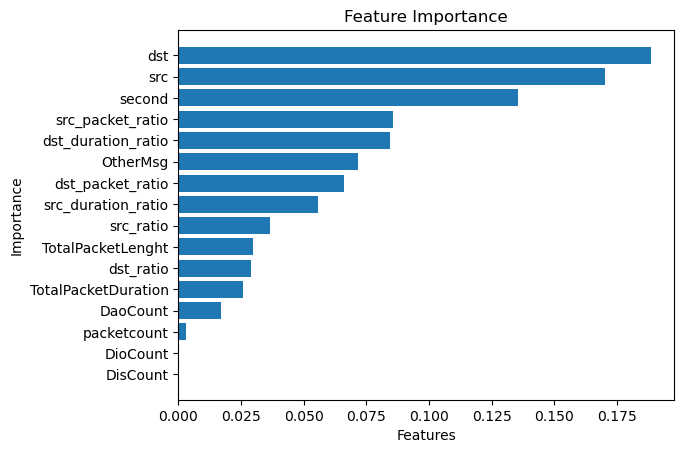

In [32]:
features = feats_df
targets = df['label']
dtc_model = DecisionTreeClassifier()
dtc_model.fit(features,targets)
feat_importance = dtc_model.feature_importances_

# Sort feature importances in descending order
sorted_index = feat_importance.argsort()[::1]  
sorted_importance = feat_importance[sorted_index]
sorted_columns = features.columns[sorted_index]

plt.barh(sorted_columns, sorted_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

Let's take a look at another model and see how they compare!

### Multi-class Classification: Random Forest Classifier

The Random Forest Classifier from sklearn combines multiple Decision Tree Classifiers, each trained on a random subset of the data using random subsets of features, averaging the results to improve predictive accuracy and overfitting. This algorithm essentially creates a "forest" of Decision Tree Classifiers and aggregates the predictions from each one to reach its final classification. This method of averaging reduces errors and generally improves performance, making the Random Forest Classifier a more robust and effective model than a single Decision Tree Classifier. If there is more that you would like to read about the Random Forest Classifier model, you can see sklearn's documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Once again, we will be following along with our general step-by-step guide to working with classifier models, as shown before.

#### Step 2:

In [33]:
# Performing a train-test split
X = feats_df
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 3 & 4:

In [34]:
# Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Creating/Fitting Object for Random Forest Classifier Model 
rfc_model = RandomForestClassifier(n_estimators=300, criterion='entropy')
rfc_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300)

#### Step 5:

In [35]:
# Making Predictions
y_pred = rfc_model.predict(X_test)

#### Step 6:

In [36]:
# Evaluating Performance
report = classification_report(y_test, y_pred)
print(report)

# print("The accuracy of the model on the training data: %0.3f" % (model.score(X_test,y_test)))

              precision    recall  f1-score   support

         DFA       0.76      0.68      0.72       369
         SFA       0.78      0.72      0.75       473
         SHA       0.50      0.52      0.51       476
         SYA       0.95      0.96      0.96       441
         VNA       0.47      0.52      0.50       410

    accuracy                           0.68      2169
   macro avg       0.69      0.68      0.69      2169
weighted avg       0.69      0.68      0.69      2169



The classification report for the Random Forest Classifier model yields marginally better results than the Decision Tree Classifier for every class, which makes sense. It looks like our classification model is able to predict the DFA, SFA and SYA labels with a good precision, but still struggles to predict the SHA and VNA labels. It seems like it may be due to the nature of this dataset. The overall accuracy of the Random Forest Classification model is shown to be 68%.

Again, let's take a look at which features are the most significant in predicting the type of IoT attack using the Random Forest Classifier algorithm.

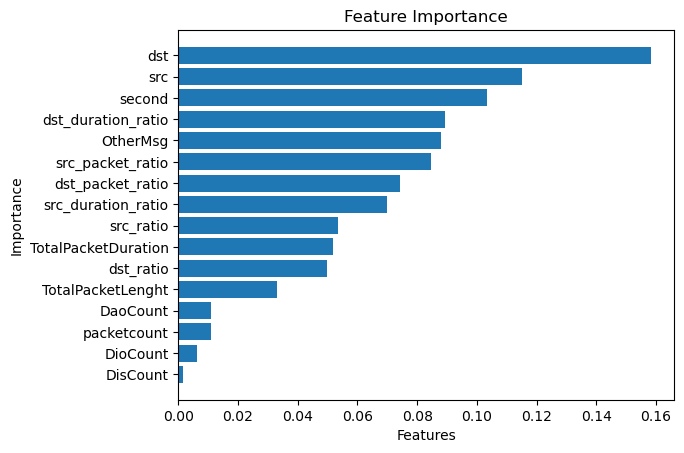

In [37]:
features = feats_df
targets = df['label']
rfc_model = RandomForestClassifier()
rfc_model.fit(features,targets)
feat_importance = rfc_model.feature_importances_

# Sort feature importances in descending order
sorted_index = feat_importance.argsort()[::1]  
sorted_importance = feat_importance[sorted_index]
sorted_columns = features.columns[sorted_index]

plt.barh(sorted_columns, sorted_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

Classification is a useful technique to categorize data based on a set of input features and it can be applied to a wide variety of IoT related data. Remember that it is important to continually look for ways to improve our classification models and update them to really ensure accuracy in the results.